In [33]:
from konlpy.tag import Komoran

komoran=Komoran()

import pandas as pd
import os
import numpy as np
def Corona_POS_tag(x):
    Corona=pd.read_csv('/home/u1013/schtm_osy_lsm_kjh/Crawling_Dataset/{0}'.format(x),encoding='utf-8')
    Corona=Corona.drop('Unnamed: 0',axis=1)
    Corona_text=np.array(Corona.loc[:,'Text'].tolist())
    Corona_pos_words=[]
    for i in range(len(Corona)):
        Corona_pos_words.append(komoran.pos(Corona_text[i]))
    total_text=[]
    pos_text=[]
    keyword=['코로나방역','방역','코로나바이러스','19']
    for j in range(len(Corona)):
        text_list=Corona_pos_words[j]
        for i in range(len(text_list)):
            if text_list[i][1] not in ('SF','SP','SS','SE','SO','SW') and text_list[i][0] not in keyword:
                pos_text.append(text_list[i][:])
        total_text.append(pos_text)
        pos_text=[]
    sub_pos=[]
    selected_pos=[]
    for j in range(len(total_text)):
        pos_list=total_text[j]
        for i in range(len(pos_list)):
            if pos_list[i][1] in ('NNG','NNP','MM','MAG'):
                sub_pos.append(pos_list[i][0])
    return sub_pos



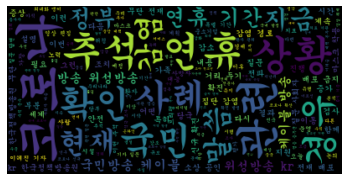

In [26]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = './gungsuh.ttf'

noun_text=''
for i in tag:
    noun_text=noun_text+' '+i
wordcloud=WordCloud(max_font_size=60,relative_scaling=.5,font_path=FONT_PATH).generate(noun_text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
tag=Corona_POS_tag('한국경제TV_코로나방역.csv')

In [41]:
import pickle

with open('한국경제TV_코로나방역.txt','wb') as f:
    pickle.dump(tag,f)

In [42]:
with open('한국경제TV_코로나방역.txt','rb') as f:
    read=pickle.load(f)
    print(read)

['사진', '연합뉴스', '서울시', '신종', '감염증', '코로나', '확산', '시내버스', '업체', '지원', '비용', '지난달', '올', '상반기', '절반', '수준', '확인', '지원금', '서울시', '기준', '그대로', '유지', '입장', '버스', '업체', '업체', '작업', '진행', '토로', '수도권', '교회', '발', '코로나', '유행', '조짐', '가운데', '작업', '제대로', '대중교통', '집단', '감염', '뇌관', '지적', '지원금', '감소', '한국경제신문', '서울시', '정보', '공개', '신청', '입수', '자료', '서울시', '매달', '버스', '업체', '지원', '비용', '올', '상반기', '버스', '한', '대당', '인건비', '물품', '비', '지난달', '인건비', '물품', '비', '서울시', '지원금', '절반', '매', '회차', '마다', '버스', '안', '손잡이', '봉', '의자', '소독', '기준', '그대로', '준수', '지침', '지원금', '버스', '업체', '하청', '업체', '부담', '한', '업체', '대표', '버스', '업체', '서울시', '지원금', '이유', '7월', '기존', '금액', '절반', '수준', '계약', '요구', '버스', '한', '대당', '투입', '작업자', '현장', '근로자', '임금', '겨우', '수지', '말', '작업자', '작업', '질', '당연히', '기존', '손잡이', '소독', '수건', '이제', '소독', '기준', '간신히', '선심', '복지', '치중', '예산', '평', '지하철', '비상', '서울시', '6월', '추가경정예산', '지하철', '비용', '확보', '서울시의회', '제출', '추경안', '9월', '이후', '지하철', '비용', '포함', '서울시', '관계자', '예산', '재난', '관리', '기금', '비용', '사용', '예정